In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Traffic.csv')
display(df.head())

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation
0,12:00:00 AM,10,Tuesday,31.0,0,4,4,low
1,12:15:00 AM,10,Tuesday,49.0,0,3,3,low
2,12:30:00 AM,10,Tuesday,46.0,0,3,6,low
3,12:45:00 AM,10,Tuesday,51.0,0,2,5,low
4,1:00:00 AM,10,Tuesday,57.0,6,15,16,normal


In [ ]:
df.shape

(2977, 8)

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1


In [ ]:
df.drop_duplicates(inplace=True)
duplicate_rows_after_removal = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after_removal}")

Number of duplicate rows after removal: 0


In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Time,0
Date,0
Day of the week,5
CarCount,4
BikeCount,0
BusCount,0
TruckCount,0
Traffic Situation,0


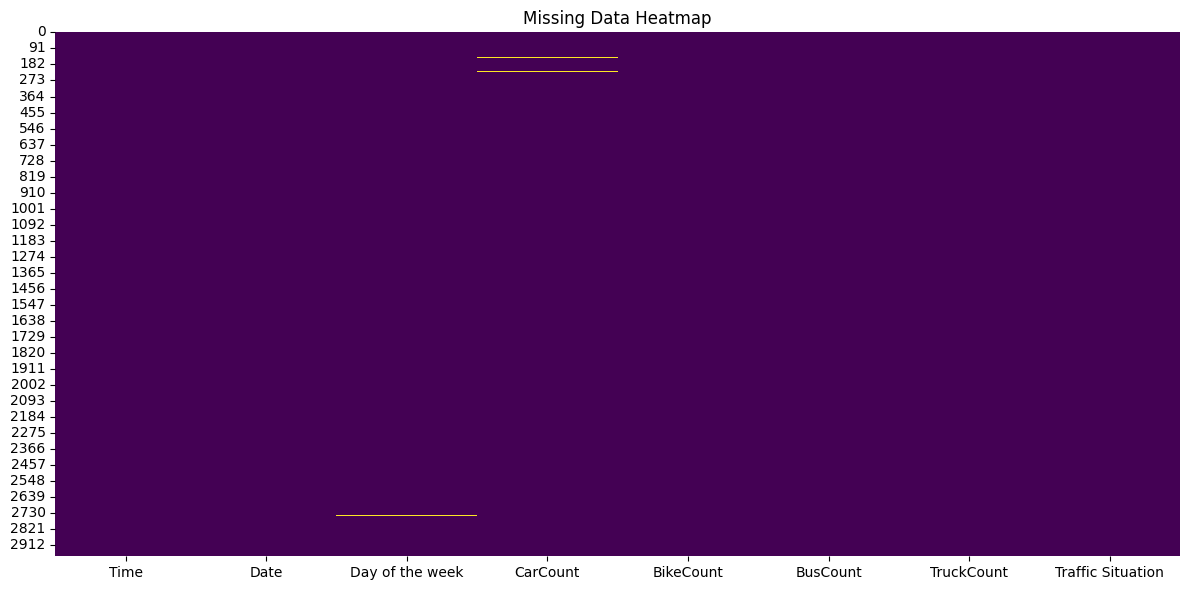

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
df['CarCount'] = df['CarCount'].fillna(df['CarCount'].mean()).astype(int)
display(df.isnull().sum())

,0
Time,0
Date,0
Day of the week,5
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Traffic Situation,0


In [ ]:
df['Day of the week'] = df['Day of the week'].fillna(df['Day of the week'].mode()[0])
display(df.isnull().sum())

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Traffic Situation,0


In [ ]:
df.info()
display(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 2976 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Traffic Situation  2976 non-null   object
dtypes: int64(5), object(3)
memory usage: 209.2+ KB


,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Traffic Situation,object


In [ ]:
print("Unique values in 'Day of the week':")
display(df['Day of the week'].unique())

Unique values in 'Day of the week':


array(['Tuesday', 'Tue', 'Thursday', 'Wednesday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Thrsday'], dtype=object)

In [ ]:
df['Day of the week'] = df['Day of the week'].replace({'Tue': 'Tuesday', 'Thrsday': 'Thursday'})
display(df['Day of the week'].unique())

array(['Tuesday', 'Thursday', 'Wednesday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [ ]:
print("Unique values in 'Traffic Situation':")
display(df['Traffic Situation'].unique())

Unique values in 'Traffic Situation':


array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [ ]:
vehicle_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
for col in vehicle_cols:
    negative_values = df[df[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in '{col}':")
        display(negative_values)
    else:
        print(f"No negative values found in '{col}'.")

No negative values found in 'CarCount'.
No negative values found in 'BikeCount'.
Negative values found in 'BusCount':


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation
8,2:00:00 AM,10,Tuesday,51,0,-9,7,low
22,5:30:00 AM,10,Tuesday,56,12,-2,14,normal
28,7:00:00 AM,10,Tuesday,102,39,-47,1,heavy
2945,4:15:00 PM,9,Thursday,116,24,-36,6,heavy


No negative values found in 'TruckCount'.


In [ ]:
df['BusCount'] = df['BusCount'].apply(lambda x: max(x, 0))
print("Negative values in 'BusCount' after handling:")
display(df[df['BusCount'] < 0])

Negative values in 'BusCount' after handling:


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation


Outlier values found in 'BikeCount':


,BikeCount
326,52
327,59
329,56
331,68
332,70
...,...
2362,59
2364,60
2842,150
2910,200


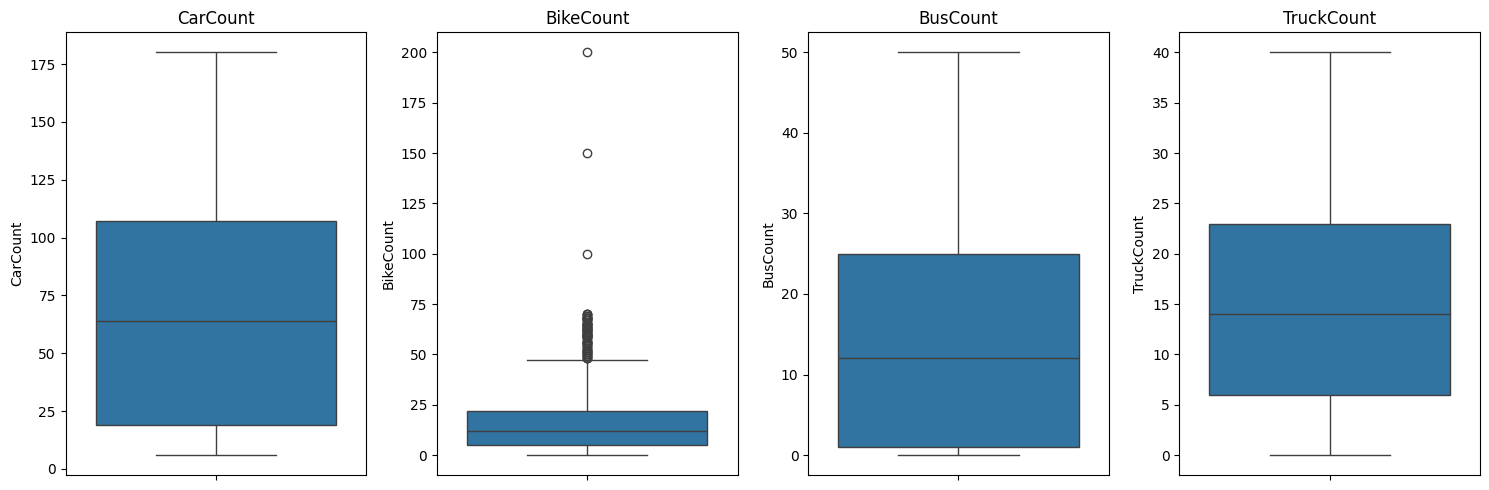

In [ ]:
vehicle_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
plt.figure(figsize=(15, 5))
for i, col in enumerate(vehicle_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

    # Calculate IQR and identify outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Outlier values found in '{col}':")
        display(outliers[[col]])

plt.tight_layout()
plt.show()

In [ ]:
vehicle_cols_with_outliers = ['BikeCount']

for col in vehicle_cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("DataFrame shape after outlier removal:")
display(df.shape)

DataFrame shape after outlier removal:


(2896, 8)

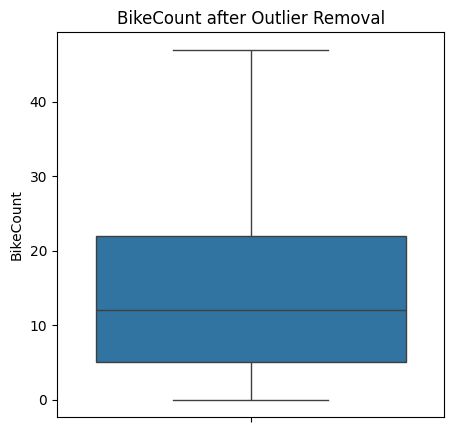

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=df['BikeCount'])
plt.title('BikeCount after Outlier Removal')
plt.show()

In [ ]:
print("Current state of 'Time' and 'Date' columns:")
display(df[['Time', 'Date']].head())
display(df[['Time', 'Date']].dtypes)

Current state of 'Time' and 'Date' columns:


,Time,Date
0,12:00:00 AM,10
1,12:15:00 AM,10
2,12:30:00 AM,10
3,12:45:00 AM,10
4,1:00:00 AM,10


,0
Time,object
Date,int64


In [ ]:
# Convert 'Time' to datetime objects and extract numerical features
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Combine 'Date' and 'Time' into a new 'DateTime' column
# Assuming a placeholder year and month as they are not provided in the data
df['DateTime'] = pd.to_datetime('2025-' + '01' + '-' + df['Date'].astype(str) + ' ' + df['Hour'].astype(str) + ':' + df['Minute'].astype(str) + ':00', format='%Y-%m-%d %H:%M:%S')

# Drop the original 'Time' and 'Date' columns
df = df.drop(['Time', 'Date'], axis=1)

display(df.head())
display(df.dtypes)

/tmp/ipython-input-1475734057.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour,Minute,DateTime
0,Tuesday,31,0,4,4,low,0,0,2025-01-10 00:00:00
1,Tuesday,49,0,3,3,low,0,15,2025-01-10 00:15:00
2,Tuesday,46,0,3,6,low,0,30,2025-01-10 00:30:00
3,Tuesday,51,0,2,5,low,0,45,2025-01-10 00:45:00
4,Tuesday,57,6,15,16,normal,1,0,2025-01-10 01:00:00


,0
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Traffic Situation,object
Hour,int32
Minute,int32
DateTime,datetime64[ns]


In [ ]:
df['total'] = df['CarCount'] + df['BikeCount'] + df['BusCount'] + df['TruckCount']
display(df.head())

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour,Minute,DateTime,total
0,Tuesday,31,0,4,4,low,0,0,2025-01-10 00:00:00,39
1,Tuesday,49,0,3,3,low,0,15,2025-01-10 00:15:00,55
2,Tuesday,46,0,3,6,low,0,30,2025-01-10 00:30:00,55
3,Tuesday,51,0,2,5,low,0,45,2025-01-10 00:45:00,58
4,Tuesday,57,6,15,16,normal,1,0,2025-01-10 01:00:00,94


In [ ]:
vehicle_and_total_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'total']

for col in vehicle_and_total_cols:
    # Create quantile-based bins (4 bins)
    df[f'{col}_Quantized'] = pd.qcut(df[col], q=4, labels=False, duplicates='drop')
    print(f"Quantized '{col}' column:")
    display(df[[col, f'{col}_Quantized']].head())
    display(df[f'{col}_Quantized'].value_counts().sort_index())

Quantized 'CarCount' column:


,CarCount,CarCount_Quantized
0,31,1
1,49,1
2,46,1
3,51,1
4,57,1


,count
CarCount_Quantized,
0,745
1,708
2,738
3,705


Quantized 'BikeCount' column:


,BikeCount,BikeCount_Quantized
0,0,0
1,0,0
2,0,0
3,0,0
4,6,1


,count
BikeCount_Quantized,
0,934
1,576
2,725
3,661


Quantized 'BusCount' column:


,BusCount,BusCount_Quantized
0,4,1
1,3,1
2,3,1
3,2,1
4,15,2


,count
BusCount_Quantized,
0,829
1,621
2,728
3,718


Quantized 'TruckCount' column:


,TruckCount,TruckCount_Quantized
0,4,0
1,3,0
2,6,0
3,5,0
4,16,2


,count
TruckCount_Quantized,
0,788
1,679
2,755
3,674


Quantized 'total' column:


,total,total_Quantized
0,39,0
1,55,0
2,55,0
3,58,1
4,94,1


,count
total_Quantized,
0,753
1,698
2,724
3,721


In [ ]:
display(df.head())

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour,Minute,DateTime,total,CarCount_Quantized,BikeCount_Quantized,BusCount_Quantized,TruckCount_Quantized,total_Quantized
0,Tuesday,31,0,4,4,low,0,0,2025-01-10 00:00:00,39,1,0,1,0,0
1,Tuesday,49,0,3,3,low,0,15,2025-01-10 00:15:00,55,1,0,1,0,0
2,Tuesday,46,0,3,6,low,0,30,2025-01-10 00:30:00,55,1,0,1,0,0
3,Tuesday,51,0,2,5,low,0,45,2025-01-10 00:45:00,58,1,0,1,0,1
4,Tuesday,57,6,15,16,normal,1,0,2025-01-10 01:00:00,94,1,1,2,2,1


In [ ]:
# Select categorical columns for one-hot encoding (excluding the target variable)
categorical_cols = ['Day of the week']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())
display(df.dtypes)

,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour,Minute,DateTime,total,CarCount_Quantized,BikeCount_Quantized,BusCount_Quantized,TruckCount_Quantized,total_Quantized,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,31,0,4,4,low,0,0,2025-01-10 00:00:00,39,1,0,1,0,0,False,False,False,False,True,False
1,49,0,3,3,low,0,15,2025-01-10 00:15:00,55,1,0,1,0,0,False,False,False,False,True,False
2,46,0,3,6,low,0,30,2025-01-10 00:30:00,55,1,0,1,0,0,False,False,False,False,True,False
3,51,0,2,5,low,0,45,2025-01-10 00:45:00,58,1,0,1,0,1,False,False,False,False,True,False
4,57,6,15,16,normal,1,0,2025-01-10 01:00:00,94,1,1,2,2,1,False,False,False,False,True,False


,0
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Traffic Situation,object
Hour,int32
Minute,int32
DateTime,datetime64[ns]
total,int64
CarCount_Quantized,int64


In [ ]:
# Convert boolean columns to integers (0 or 1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

display(df.head())
display(df.dtypes)

,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour,Minute,DateTime,total,CarCount_Quantized,BikeCount_Quantized,BusCount_Quantized,TruckCount_Quantized,total_Quantized,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,31,0,4,4,low,0,0,2025-01-10 00:00:00,39,1,0,1,0,0,0,0,0,0,1,0
1,49,0,3,3,low,0,15,2025-01-10 00:15:00,55,1,0,1,0,0,0,0,0,0,1,0
2,46,0,3,6,low,0,30,2025-01-10 00:30:00,55,1,0,1,0,0,0,0,0,0,1,0
3,51,0,2,5,low,0,45,2025-01-10 00:45:00,58,1,0,1,0,1,0,0,0,0,1,0
4,57,6,15,16,normal,1,0,2025-01-10 01:00:00,94,1,1,2,2,1,0,0,0,0,1,0


,0
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Traffic Situation,object
Hour,int32
Minute,int32
DateTime,datetime64[ns]
total,int64
CarCount_Quantized,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Traffic Situation' column, replacing the original column
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

# Display the mapping of original labels to encoded values (using the fitted encoder)
print("Mapping of original 'Traffic Situation' labels to encoded values:")
display(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Display the first few rows of the modified 'Traffic Situation' column
display(df['Traffic Situation'].head())
display(df.dtypes)

Mapping of original 'Traffic Situation' labels to encoded values:


{'heavy': np.int64(0),
 'high': np.int64(1),
 'low': np.int64(2),
 'normal': np.int64(3)}

,Traffic Situation
0,2
1,2
2,2
3,2
4,3


,0
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Traffic Situation,int64
Hour,int32
Minute,int32
DateTime,datetime64[ns]
total,int64
CarCount_Quantized,int64


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 2896 entries, 0 to 2974
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CarCount                   2896 non-null   int64         
 1   BikeCount                  2896 non-null   int64         
 2   BusCount                   2896 non-null   int64         
 3   TruckCount                 2896 non-null   int64         
 4   Traffic Situation          2896 non-null   int64         
 5   Hour                       2896 non-null   int32         
 6   Minute                     2896 non-null   int32         
 7   DateTime                   2896 non-null   datetime64[ns]
 8   total                      2896 non-null   int64         
 9   CarCount_Quantized         2896 non-null   int64         
 10  BikeCount_Quantized        2896 non-null   int64         
 11  BusCount_Quantized         2896 non-null   int64         
 12  TruckCount_

,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour,Minute,DateTime,total,CarCount_Quantized,BikeCount_Quantized,BusCount_Quantized,TruckCount_Quantized,total_Quantized,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000
mean,66.348757,13.738950,15.147445,15.686464,2.048688,11.486878,22.474102,2025-01-16 12:08:05.738950144,110.921616,1.484461,1.384323,1.460981,1.454075,1.487914,0.131906,0.132597,0.132597,0.166782,0.165055,0.165055
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2025-01-01 00:00:00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,5.000000,1.000000,7.000000,1.000000,5.000000,0.000000,2025-01-08 18:11:15,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,12.000000,11.000000,14.000000,3.000000,11.000000,15.000000,2025-01-16 11:52:30,106.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,105.000000,22.000000,25.000000,24.000000,3.000000,18.000000,30.000000,2025-01-24 05:48:45,159.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.000000,47.000000,50.000000,40.000000,3.000000,23.000000,45.000000,2025-01-31 23:45:00,255.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,44.045932,10.696579,14.470672,10.512223,1.232005,7.008150,16.773386,NaN,57.425447,1.118737,1.156979,1.147738,1.121603,1.126165,0.338447,0.339197,0.339197,0.372845,0.371295,0.371295


In [ ]:
# Drop the 'DateTime' column as it's not needed if only Hour and Minute are kept
df = df.drop('DateTime', axis=1)

display(df.head())
display(df.dtypes)

,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation,Hour,Minute,total,CarCount_Quantized,BikeCount_Quantized,BusCount_Quantized,TruckCount_Quantized,total_Quantized,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,31,0,4,4,2,0,0,39,1,0,1,0,0,0,0,0,0,1,0
1,49,0,3,3,2,0,15,55,1,0,1,0,0,0,0,0,0,1,0
2,46,0,3,6,2,0,30,55,1,0,1,0,0,0,0,0,0,1,0
3,51,0,2,5,2,0,45,58,1,0,1,0,1,0,0,0,0,1,0
4,57,6,15,16,3,1,0,94,1,1,2,2,1,0,0,0,0,1,0


,0
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Traffic Situation,int64
Hour,int32
Minute,int32
total,int64
CarCount_Quantized,int64
BikeCount_Quantized,int64


In [ ]:
# Drop the unquantized vehicle count and total columns
cols_to_drop = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'total']
df = df.drop(cols_to_drop, axis=1)

display(df.head())
display(df.dtypes)

,Traffic Situation,Hour,Minute,CarCount_Quantized,BikeCount_Quantized,BusCount_Quantized,TruckCount_Quantized,total_Quantized,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,2,0,0,1,0,1,0,0,0,0,0,0,1,0
1,2,0,15,1,0,1,0,0,0,0,0,0,1,0
2,2,0,30,1,0,1,0,0,0,0,0,0,1,0
3,2,0,45,1,0,1,0,1,0,0,0,0,1,0
4,3,1,0,1,1,2,2,1,0,0,0,0,1,0


,0
Traffic Situation,int64
Hour,int32
Minute,int32
CarCount_Quantized,int64
BikeCount_Quantized,int64
BusCount_Quantized,int64
TruckCount_Quantized,int64
total_Quantized,int64
Day of the week_Monday,int64
Day of the week_Saturday,int64


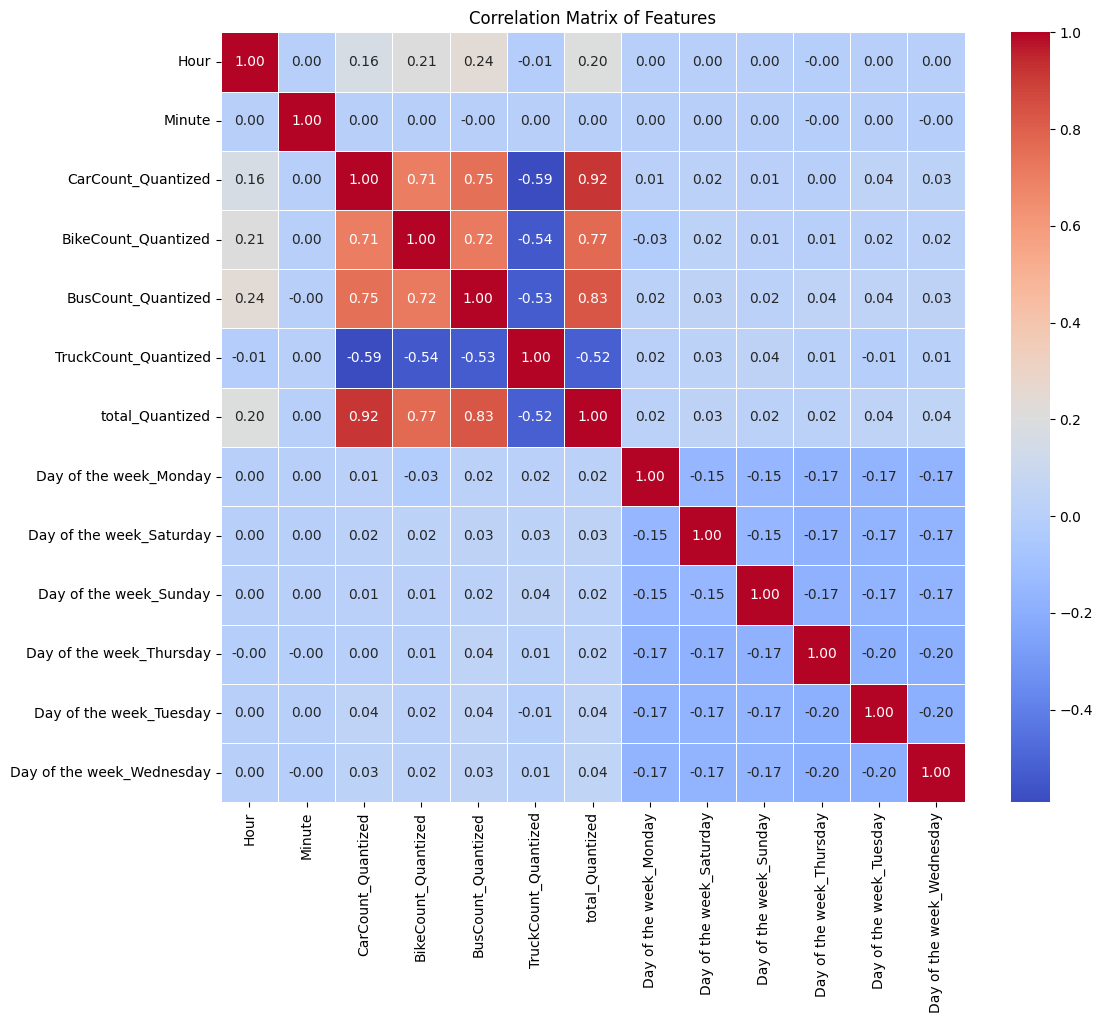

In [ ]:
# Drop the target variable to check collinearity among features
features_df = df.drop('Traffic Situation', axis=1)

# Calculate the correlation matrix
correlation_matrix = features_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale (excluding the target and already encoded binary columns)
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Traffic Situation') # Exclude target variable
# Exclude one-hot encoded day of the week columns which are already 0/1
numerical_features = [col for col in numerical_features if not col.startswith('Day of the week_')]


# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())
display(df.dtypes)

,Traffic Situation,Hour,Minute,CarCount_Quantized,BikeCount_Quantized,BusCount_Quantized,TruckCount_Quantized,total_Quantized,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,2,-1.639357,-1.340098,-0.433118,-1.196705,-0.401712,-1.296649,-1.321450,0,0,0,0,1,0
1,2,-1.639357,-0.445670,-0.433118,-1.196705,-0.401712,-1.296649,-1.321450,0,0,0,0,1,0
2,2,-1.639357,0.448758,-0.433118,-1.196705,-0.401712,-1.296649,-1.321450,0,0,0,0,1,0
3,2,-1.639357,1.343187,-0.433118,-1.196705,-0.401712,-1.296649,-0.433328,0,0,0,0,1,0
4,3,-1.496642,-1.340098,-0.433118,-0.332236,0.469717,0.486821,-0.433328,0,0,0,0,1,0


,0
Traffic Situation,int64
Hour,float64
Minute,float64
CarCount_Quantized,float64
BikeCount_Quantized,float64
BusCount_Quantized,float64
TruckCount_Quantized,float64
total_Quantized,float64
Day of the week_Monday,int64
Day of the week_Saturday,int64


Distribution of 'Traffic Situation':


,count
Traffic Situation,
3,1668
0,603
1,321
2,304


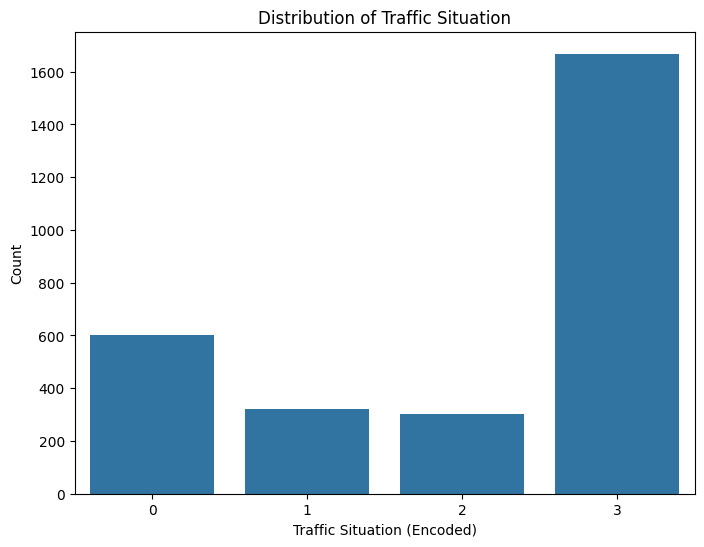

In [ ]:
# Display the value counts of the target variable
print("Distribution of 'Traffic Situation':")
display(df['Traffic Situation'].value_counts())

# Visualize the distribution using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Traffic Situation'])
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation (Encoded)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of training data (X_train, y_train):")
display(X_train.shape, y_train.shape)

print("\nShape of testing data (X_test, y_test):")
display(X_test.shape, y_test.shape)

Shape of training data (X_train, y_train):


(2316, 13)

(2316,)


Shape of testing data (X_test, y_test):


(580, 13)

(580,)

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of training data after SMOTE (X_train_resampled, y_train_resampled):")
display(X_train_resampled.shape, y_train_resampled.shape)

print("\nDistribution of target variable in training data after SMOTE:")
display(y_train_resampled.value_counts())

Shape of training data after SMOTE (X_train_resampled, y_train_resampled):


(5336, 13)

(5336,)


Distribution of target variable in training data after SMOTE:


,count
Traffic Situation,
3,1334
0,1334
2,1334
1,1334


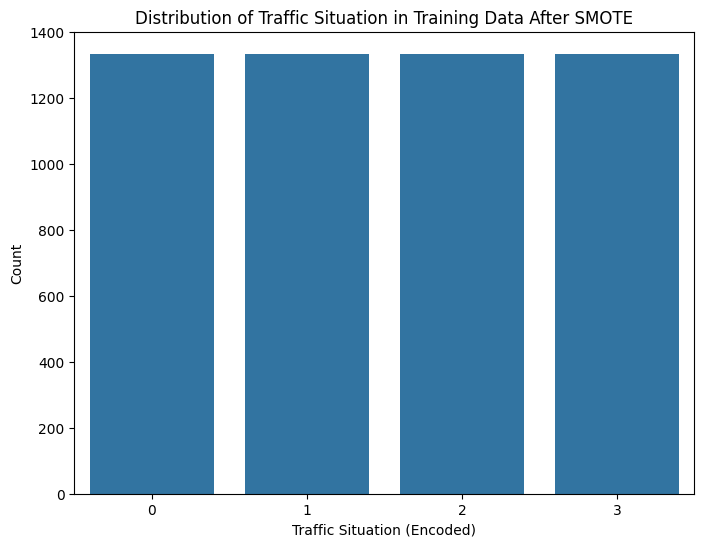

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Traffic Situation in Training Data After SMOTE')
plt.xlabel('Traffic Situation (Encoded)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5) # Using 5 neighbors as a starting point
knn_model.fit(X_train_resampled, y_train_resampled)

print("KNN model training complete.")

KNN model training complete.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
display(confusion_matrix(y_test, y_pred_knn))

KNN Model Evaluation on Test Set:
Accuracy: 0.8293103448275863

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       121
           1       0.59      0.75      0.66        64
           2       0.64      0.89      0.74        61
           3       0.96      0.79      0.87       334

    accuracy                           0.83       580
   macro avg       0.75      0.84      0.79       580
weighted avg       0.86      0.83      0.83       580


Confusion Matrix:


array([[115,   6,   0,   0],
       [ 12,  48,   0,   4],
       [  0,   0,  54,   7],
       [ 13,  27,  30, 264]])

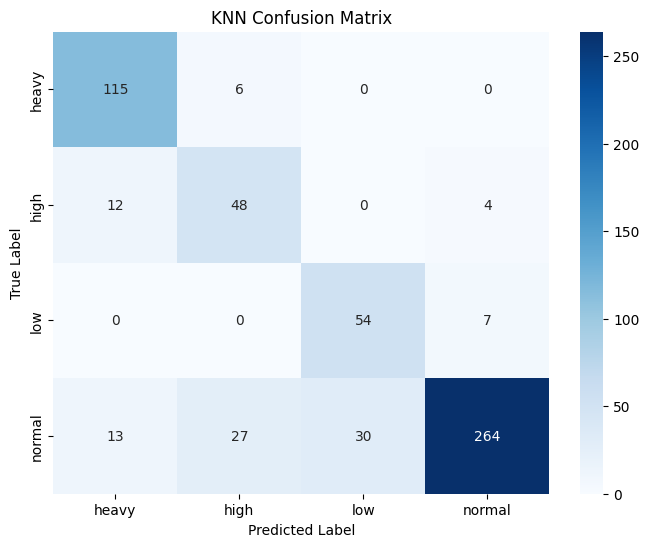

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_knn are available from the previous evaluation step

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Get the class labels using the provided mapping
# The mapping was {'heavy': 0, 'high': 1, 'low': 2, 'normal': 3}
# We need to reverse this mapping to get labels from encoded values
encoded_to_label = {0: 'heavy', 1: 'high', 2: 'low', 3: 'normal'}
class_labels = [encoded_to_label[i] for i in sorted(encoded_to_label.keys())]


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42) # Using a random state for reproducibility
dt_model.fit(X_train_resampled, y_train_resampled)

print("Decision Tree model training complete.")

Decision Tree model training complete.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
display(confusion_matrix(y_test, y_pred_dt))

Decision Tree Model Evaluation on Test Set:
Accuracy: 0.853448275862069

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       121
           1       0.68      0.78      0.73        64
           2       0.73      0.70      0.72        61
           3       0.91      0.89      0.90       334

    accuracy                           0.85       580
   macro avg       0.80      0.81      0.80       580
weighted avg       0.86      0.85      0.85       580


Confusion Matrix:


array([[104,  12,   0,   5],
       [  8,  50,   0,   6],
       [  1,   0,  43,  17],
       [  9,  11,  16, 298]])

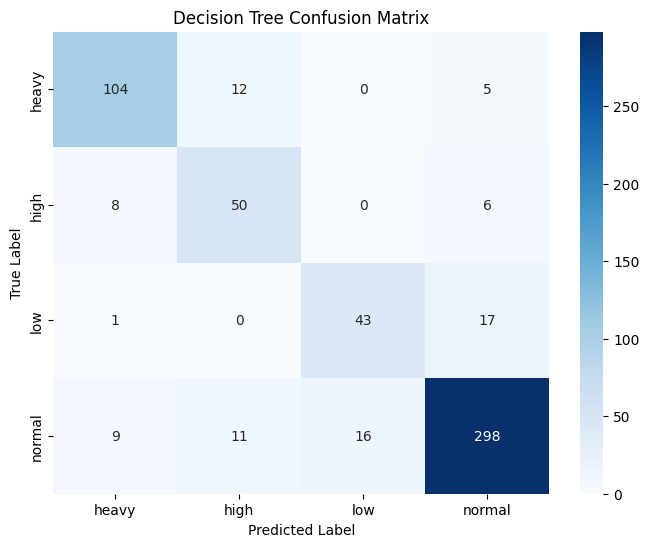

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_dt are available from the previous evaluation step

# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Get the class labels using the provided mapping
# The mapping was {'heavy': 0, 'high': 1, 'low': 2, 'normal': 3}
encoded_to_label = {0: 'heavy', 1: 'high', 2: 'low', 3: 'normal'}
class_labels = [encoded_to_label[i] for i in sorted(encoded_to_label.keys())]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Now, I will train, evaluate, and visualize the results for the Random Forest model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Using 100 estimators as a starting point
rf_model.fit(X_train_resampled, y_train_resampled)

print("Random Forest model training complete.")

Random Forest model training complete.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
display(confusion_matrix(y_test, y_pred_rf))

Random Forest Model Evaluation on Test Set:
Accuracy: 0.8879310344827587

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       121
           1       0.75      0.81      0.78        64
           2       0.77      0.84      0.80        61
           3       0.95      0.90      0.92       334

    accuracy                           0.89       580
   macro avg       0.84      0.87      0.85       580
weighted avg       0.89      0.89      0.89       580


Confusion Matrix:


array([[111,   8,   0,   2],
       [  8,  52,   0,   4],
       [  0,   0,  51,  10],
       [  9,   9,  15, 301]])

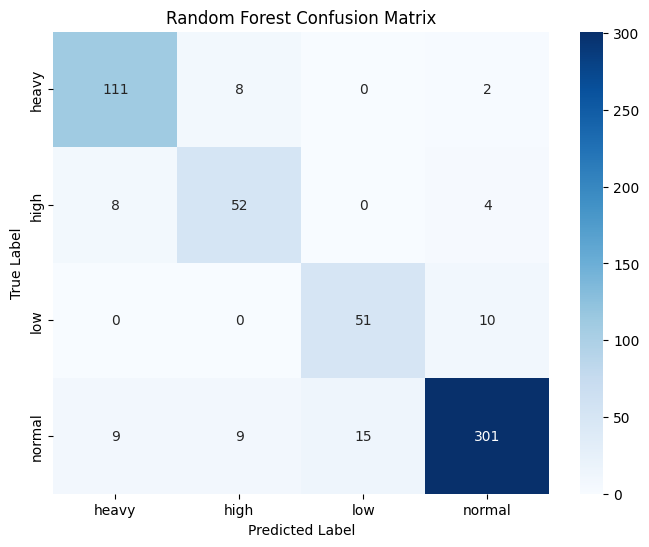

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_rf are available from the previous evaluation step

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Get the class labels using the provided mapping
# The mapping was {'heavy': 0, 'high': 1, 'low': 2, 'normal': 3}
encoded_to_label = {0: 'heavy', 1: 'high', 2: 'low', 3: 'normal'}
class_labels = [encoded_to_label[i] for i in sorted(encoded_to_label.keys())]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
print("--- Model Comparison ---")

print("\nKNN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print("\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print("\n--- Summary of Key Metrics ---")
print("Model          Accuracy  Heavy (F1)  High (F1)  Low (F1)  Normal (F1)")
print(f"KNN            {accuracy_score(y_test, y_pred_knn):.4f}    {classification_report(y_test, y_pred_knn, output_dict=True)['0']['f1-score']:.4f}     {classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score']:.4f}    {classification_report(y_test, y_pred_knn, output_dict=True)['2']['f1-score']:.4f}     {classification_report(y_test, y_pred_knn, output_dict=True)['3']['f1-score']:.4f}")
print(f"Decision Tree  {accuracy_score(y_test, y_pred_dt):.4f}    {classification_report(y_test, y_pred_dt, output_dict=True)['0']['f1-score']:.4f}     {classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score']:.4f}    {classification_report(y_test, y_pred_dt, output_dict=True)['2']['f1-score']:.4f}     {classification_report(y_test, y_pred_dt, output_dict=True)['3']['f1-score']:.4f}")
print(f"Random Forest  {accuracy_score(y_test, y_pred_rf):.4f}    {classification_report(y_test, y_pred_rf, output_dict=True)['0']['f1-score']:.4f}     {classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']:.4f}    {classification_report(y_test, y_pred_rf, output_dict=True)['2']['f1-score']:.4f}     {classification_report(y_test, y_pred_rf, output_dict=True)['3']['f1-score']:.4f}")

--- Model Comparison ---

KNN Model Performance:
Accuracy: 0.8293
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       121
           1       0.59      0.75      0.66        64
           2       0.64      0.89      0.74        61
           3       0.96      0.79      0.87       334

    accuracy                           0.83       580
   macro avg       0.75      0.84      0.79       580
weighted avg       0.86      0.83      0.83       580


Decision Tree Model Performance:
Accuracy: 0.8534
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       121
           1       0.68      0.78      0.73        64
           2       0.73      0.70      0.72        61
           3       0.91      0.89      0.90       334

    accuracy                           0.85       580
   macro avg       0.80      0.81      0.80       580
weighted avg       0

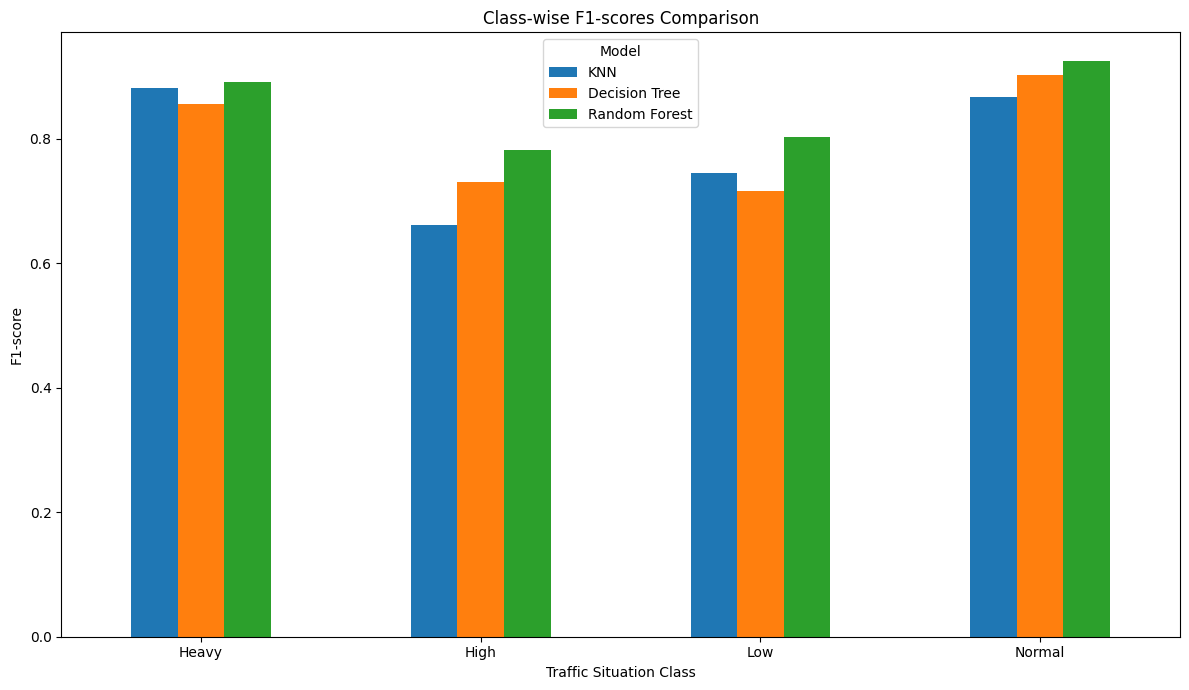

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Get classification reports for each model
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract F1-scores for each class
f1_scores_classwise = pd.DataFrame({
    'KNN': [report_knn['0']['f1-score'], report_knn['1']['f1-score'], report_knn['2']['f1-score'], report_knn['3']['f1-score']],
    'Decision Tree': [report_dt['0']['f1-score'], report_dt['1']['f1-score'], report_dt['2']['f1-score'], report_dt['3']['f1-score']],
    'Random Forest': [report_rf['0']['f1-score'], report_rf['1']['f1-score'], report_rf['2']['f1-score'], report_rf['3']['f1-score']]
}, index=['Heavy', 'High', 'Low', 'Normal'])

# Plot the class-wise F1-scores
f1_scores_classwise.plot(kind='bar', figsize=(12, 7))
plt.title('Class-wise F1-scores Comparison')
plt.xlabel('Traffic Situation Class')
plt.ylabel('F1-score')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

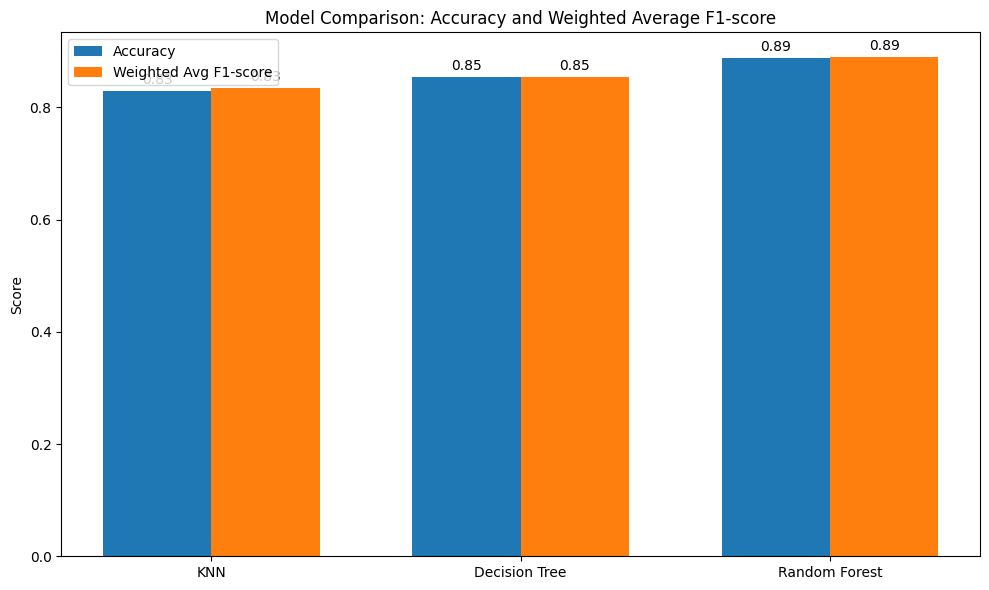

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest']

# Accuracy scores
accuracy_scores = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

# F1-scores (using weighted average F1 for overall performance considering imbalance)
f1_scores_weighted = [
    classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_dt, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score']
]

x = np.arange(len(models)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores_weighted, width, label='Weighted Avg F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy and Weighted Average F1-score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add the values on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()